In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np

In [2]:
# Perform depth-first search (DFS) to find all conjugated bond paths
def dfs(graph, bond_idx, visited):
    visited.add(bond_idx)
    max_chain = []
    for neighbor, is_connected in enumerate(graph[bond_idx]):
        if is_connected and neighbor not in visited:
            chain = dfs(graph, neighbor, visited)
            if len(chain) > len(max_chain):
                max_chain = chain
    visited.remove(bond_idx)
    return [bond_idx] + max_chain

In [3]:
def get_longest_conjugated_bond_chain(mol):
    num_bonds = mol.GetNumBonds()
    
    # Create a bond adjacency matrix based on atom connectivity
    bond_matrix = np.zeros((num_bonds, num_bonds), dtype=int)

    # Create a list to store conjugated bonds
    conjugated_bonds = []
    
    # Populate conjugated bond list and build bond connectivity matrix
    for bond in mol.GetBonds():
        if bond.GetIsConjugated():
            conjugated_bonds.append(bond.GetIdx())
    
    # Build a bond adjacency matrix where each bond is connected if they share an atom
    for i, bond_i in enumerate(mol.GetBonds()):
        for j, bond_j in enumerate(mol.GetBonds()):
            if i != j and bond_i.GetIsConjugated() and bond_j.GetIsConjugated():
                # Check if the two bonds share an atom
                if len(set([bond_i.GetBeginAtomIdx(), bond_i.GetEndAtomIdx()]) & 
                       set([bond_j.GetBeginAtomIdx(), bond_j.GetEndAtomIdx()])) > 0:
                    bond_matrix[bond_i.GetIdx(), bond_j.GetIdx()] = 1
                    bond_matrix[bond_j.GetIdx(), bond_i.GetIdx()] = 1

    # Traverse all starting bonds to find the longest conjugated bond path
    longest_bond_chain = []
    for start_bond in conjugated_bonds:
        visited = set()
        bond_chain = dfs(bond_matrix, start_bond, visited)
        if len(bond_chain) > len(longest_bond_chain):
            longest_bond_chain = bond_chain

    return longest_bond_chain

Longest conjugated bond chain length is 21 with bond indices: [7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31]


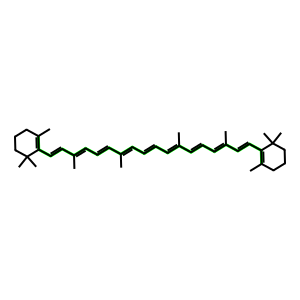

In [4]:
# Beta carotene
smiles = "CC2(C)CCCC(\C)=C2\C=C\C(\C)=C\C=C\C(\C)=C\C=C\C=C(/C)\C=C\C=C(/C)\C=C\C1=C(/C)CCCC1(C)C"
mol = Chem.MolFromSmiles(smiles)
longest_conjugated_bond_chain = get_longest_conjugated_bond_chain(mol)
print(f"Longest conjugated bond chain length is {len(longest_conjugated_bond_chain)} with bond indices: {longest_conjugated_bond_chain}")

Draw.MolToImage(
    mol,
    highlightBonds=longest_conjugated_bond_chain,
    highlightColor=(0,1,0),
    )

Longest conjugated bond chain length is 16 with bond indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 10, 11, 14, 12, 13]


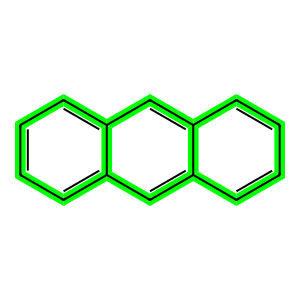

In [5]:
# Anthracene
smiles = "c1ccc2cc3ccccc3cc2c1"
mol = Chem.MolFromSmiles(smiles)
longest_conjugated_bond_chain = get_longest_conjugated_bond_chain(mol)
print(f"Longest conjugated bond chain length is {len(longest_conjugated_bond_chain)} with bond indices: {longest_conjugated_bond_chain}")
Draw.MolToImage(
    mol,
    highlightBonds=longest_conjugated_bond_chain,
    highlightColor=(0,1,0),
    )

Longest conjugated bond chain length is 7 with bond indices: [2, 1, 0, 3, 4, 5, 6]


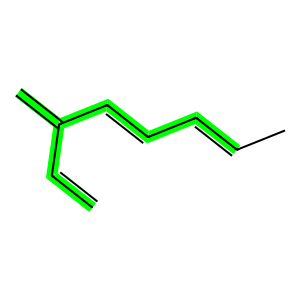

In [13]:
# Example usage:
smiles = "C=C(C=C)C=CC=CC"  # Conjugated diene system
mol = Chem.MolFromSmiles(smiles)
longest_conjugated_bond_chain = get_longest_conjugated_bond_chain(mol)
print(f"Longest conjugated bond chain length is {len(longest_conjugated_bond_chain)} with bond indices: {longest_conjugated_bond_chain}")
Draw.MolToImage(
    mol,
    highlightBonds=longest_conjugated_bond_chain,
    highlightColor=(0,1,0),
    )